# Linear Regression test of NBA stats 🏀

### Aim: Given a set of game data, predict whether the data belongs to (Jordan/Kobe/Lebron)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Data preparation

In [8]:
total = pd.read_csv('nba/allgames_stats.csv')
total = total[['3P', '3PA', 'FT', 'FTA', 'AST', 'PTS', 'Player']]
total.loc[:, 'True'] = 0
total.replace(to_replace=[None], value=0, inplace=True)
total.fillna(value=0, inplace=True)

# whom to predict
total['True'].iloc[total['Player'] == 'Kobe Bryant'] = 1

mj = total.loc[total['Player'] == 'Michael Jordan']
kb = total.loc[total['Player'] == 'Kobe Bryant']
lj = total.loc[total['Player'] == 'Lebron James']

total = pd.concat([kb, mj, lj])

In [9]:
print(len(total))
total.head(5)

4254


,3P,3PA,FT,FTA,AST,PTS,Player,True
0,0,0,0.0,0.0,0,0.0,Kobe Bryant,1
1,0,0,1.0,2.0,0,1.0,Kobe Bryant,1
2,1,2,0.0,0.0,0,5.0,Kobe Bryant,1
3,2,3,2.0,4.0,0,10.0,Kobe Bryant,1
4,0,0,2.0,2.0,1,2.0,Kobe Bryant,1


In [10]:
def normalization():
    for i in ['3P', '3PA', 'AST', 'PTS']:
        y = total.loc[:, i]
        total.loc[:, i] = preprocessing.scale(y)

In [11]:
normalization()
total.head(100)
print(total.isnull().any())

3P        False
3PA       False
FT        False
FTA       False
AST       False
PTS       False
Player    False
True      False
dtype: bool


In [18]:
def build_lr(data):
    X = data.loc[:, ['3P', '3PA', 'FT', 'FTA', 'AST', 'PTS']]
    Y = data.loc[:, 'True']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
    
    linreg = LinearRegression()
    
    model = linreg.fit(X_train, Y_train)
    print('Parameter:', model)
    print('Intercept:', linreg.intercept_)
    print('Coef:', linreg.coef_)
    
    Y_pred = linreg.predict(X_test)
    for i in range(len(Y_pred)):
        Y_pred[i] = 1 if Y_pred[i] > 0.5 else 0
    
    sum_mean = 0
    for i in range(len(Y_pred)):
        sum_mean += 1 if Y_pred[i] == Y_test.values[i] else 0
    rate = sum_mean / len(Y_pred)
    
    print('Accuracy:', rate*100, '%')
    
#     sum_mean = 0
#     for i in range(len(Y_pred)):
#         sum_mean += (Y_pred[i] - Y_test.values[i]) ** 2
#     sum_erro = np.sqrt(sum_mean / len(Y_pred))

#     print('RMSE:', sum_erro)

    plt.figure()
    plt.scatter(range(len(Y_pred)), Y_pred, label='Predict', color='r')
    plt.scatter(range(len(Y_pred)), Y_test, label='True', color='g')
    plt.legend()
    plt.show()

Parameter: LinearRegression()
Intercept: 0.3223931713707018
Coef: [ 0.00194172  0.13207512  0.06634813 -0.04692313 -0.11890587 -0.14272471]
Accuracy: 74.88262910798123 %


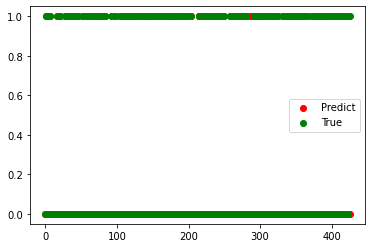

In [19]:
build_lr(total)

Parameter: LinearRegression()
Intercept: 0.3116202514463981
Coef: [ 0.00763376  0.12712548  0.06496697 -0.0452453  -0.1166302  -0.14218185]
Accuracy: 73.94366197183099 %


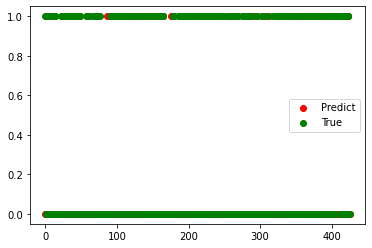

In [20]:
build_lr(total)

Parameter: LinearRegression()
Intercept: 0.3084650743108155
Coef: [-1.27646680e-04  1.31773057e-01  6.67861572e-02 -4.59675665e-02
 -1.20749692e-01 -1.37662332e-01]
Accuracy: 75.11737089201877 %


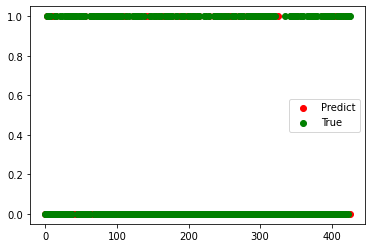

In [21]:
build_lr(total)